In [1]:
# load packages

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

D:\Anaconda\Anaconda3\envs\py35\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# change working directory

import os
os.chdir('F:/Columbia_MSAA/Courses/APANPS5500 Data Visualization/Assignment')

In [3]:
# load dataset

df_full = pd.read_csv('economy.csv')
df_full.head()

,Year,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity
0,67.00,197.892,0.329,24.165,2241.8000,57.6,67.8,8.088,138.3,73.3,830.56,37.9262,4.40,3.9,5.96,4.72,4.94,8.469,1.067,88.7
1,67.25,198.363,0.331,24.221,2255.2000,57.2,71.2,8.342,139.8,72.9,868.66,44.9585,4.51,3.8,5.50,3.84,4.05,8.916,1.091,86.8
2,67.50,198.911,0.334,24.662,2287.7000,56.5,71.3,8.822,138.0,75.4,888.51,50.1298,4.86,3.8,5.50,4.20,3.79,8.760,1.364,84.8
3,67.75,199.498,0.337,24.976,2300.6001,58.0,72.2,9.201,142.5,76.9,907.54,57.8531,5.18,4.0,5.50,4.55,3.88,7.866,1.491,85.8
4,68.00,199.920,0.341,25.818,2327.3000,59.4,77.3,5.909,146.6,78.0,884.77,61.1022,5.18,3.7,6.00,4.99,4.60,9.482,1.380,86.8


In [4]:
# dimension

print("The full dataset has {} rows and {} columns".format(df_full.shape[0],df_full.shape[1]))
df_full.shape

The full dataset has 98 rows and 20 columns


(98, 20)

In [5]:
# Calculate Skewness and Kurtosis

srs_skew = sp.stats.skew(df_full.drop(['Year'], axis=1))
srs_kurt = sp.stats.kurtosis(df_full.drop(['Year'], axis=1))

In [6]:
names = list(df_full)
names = names[1:]

In [7]:
# Descriptive analysis

df_desc = pd.DataFrame([srs_skew, srs_kurt])
df_desc.columns = names
df_desc = df_desc.rename(index={0:'Skewness', 1:'Kurtosis'})
df_desc

,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity
Skewness,0.013192,0.204162,0.379784,0.307290,0.216956,0.491277,0.338534,0.566247,0.461162,1.451860,0.731761,0.609832,0.317134,1.250051,1.155727,1.237263,-0.247634,0.279704,-0.43184
Kurtosis,-1.204988,-1.426030,-1.173653,-1.065655,-1.064426,-1.164178,-0.982251,-0.780301,-1.041767,0.706967,-0.637301,-0.434519,-0.184788,1.522178,1.061779,1.682806,-0.642823,-0.190193,-0.41860


In [8]:
# Calculate the growth rate of time series -- take the quarterly percentage change 

df_diff = df_full.drop(['Year'], axis=1).pct_change(periods=1)
df_diff['Year'] = df_full['Year']
df_diff.head()

,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.00
1,0.002380,0.006079,0.002317,0.005977,-0.006944,0.050147,0.031405,0.010846,-0.005457,0.045873,0.185421,0.025000,-0.025641,-0.077181,-0.186441,-0.180162,0.052781,0.022493,-0.021421,67.25
2,0.002763,0.009063,0.018207,0.014411,-0.012238,0.001404,0.057540,-0.012876,0.034294,0.022851,0.115024,0.077605,0.000000,0.000000,0.093750,-0.064198,-0.017497,0.250229,-0.023041,67.50
3,0.002951,0.008982,0.012732,0.005639,0.026549,0.012623,0.042961,0.032609,0.019894,0.021418,0.154066,0.065844,0.052632,0.000000,0.083333,0.023747,-0.102055,0.093109,0.011792,67.75
4,0.002115,0.011869,0.033712,0.011606,0.024138,0.070637,-0.357787,0.028772,0.014304,-0.025090,0.056161,0.000000,-0.075000,0.090909,0.096703,0.185567,0.205441,-0.074447,0.011655,68.00


In [9]:
# Calculate Skewness and Kurtosis of the new dataframe

srs_diff_skew = sp.stats.skew(df_diff.drop(['Year'], axis=1).dropna(axis=0))
srs_diff_kurt = sp.stats.kurtosis(df_diff.drop(['Year'], axis=1).dropna(axis=0))

In [10]:
# Descriptive analysis of the new dataframe

df_diff_desc = pd.DataFrame([srs_diff_skew, srs_diff_kurt])
df_diff_desc.columns = names
df_diff_desc = df_diff_desc.rename(index={0:'Skewness', 1:'Kurtosis'})
df_diff_desc

,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity
Skewness,0.365485,0.586111,-0.043954,-0.290589,-1.494633,-0.316922,-0.666284,-0.249134,-0.569921,0.024748,0.081287,-0.775244,1.776716,0.197796,0.153786,0.117901,0.375923,0.258517,-1.467016
Kurtosis,-0.534713,0.621625,1.160124,0.416478,5.131586,0.808792,2.138782,0.678574,1.193785,0.352857,-0.504069,1.260474,6.830369,2.482846,1.234753,1.009624,1.001368,-0.429039,4.929892


In [12]:
tick_x = np.arange(len(names))

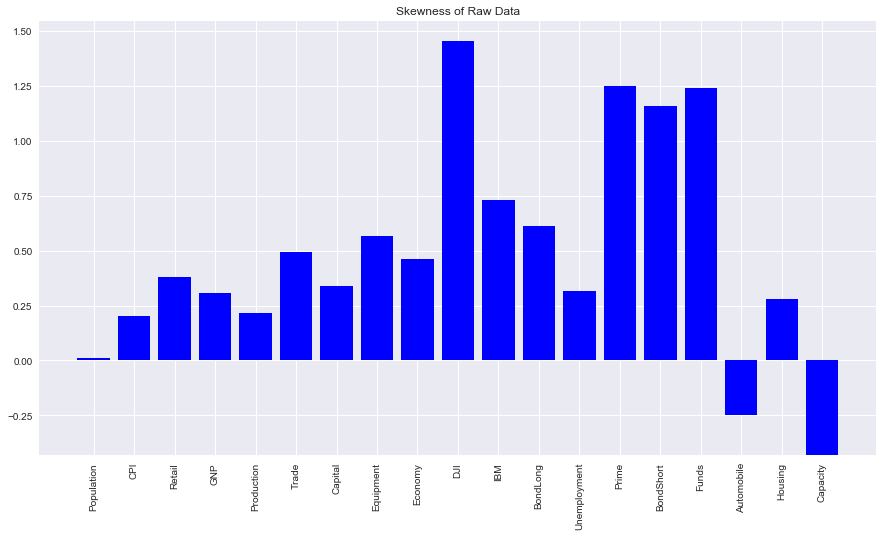

In [22]:
# Plot the bar chart of Skewness for original dataframe

plt.figure(figsize=(15,8))
plt.bar(tick_x, df_desc.loc['Skewness',:], align='center', color='blue')
plt.xticks(tick_x, names, rotation='vertical')
plt.title('Skewness of Raw Data')

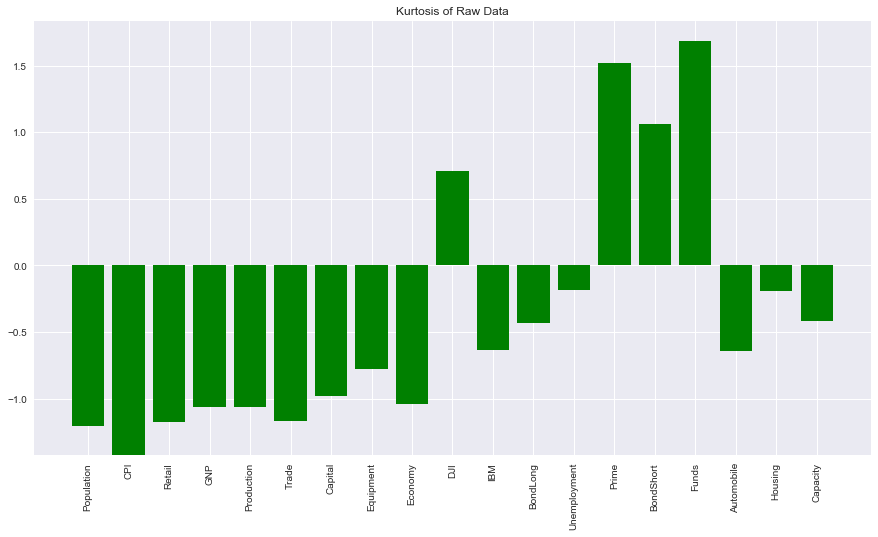

In [23]:
# Plot the bar chart of Kurtosis for original dataframe

plt.figure(figsize=(15,8))
plt.bar(tick_x, df_desc.loc['Kurtosis',:], align='center', color='green')
plt.xticks(tick_x, names, rotation='vertical')
plt.title('Kurtosis of Raw Data')

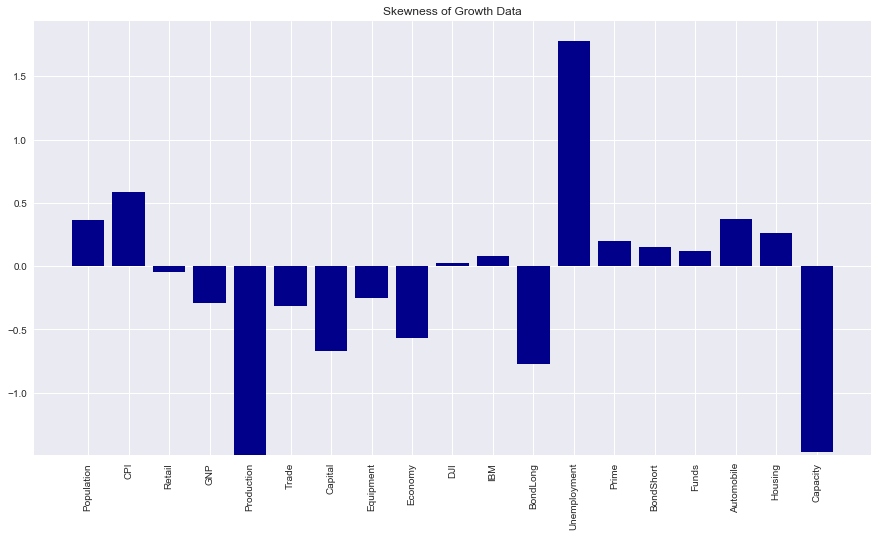

In [24]:
# Plot the bar chart of Skewness for new dataframe

plt.figure(figsize=(15,8))
plt.bar(tick_x, df_diff_desc.loc['Skewness',:], align='center', color='darkblue')
plt.xticks(tick_x, names, rotation='vertical')
plt.title('Skewness of Growth Data')

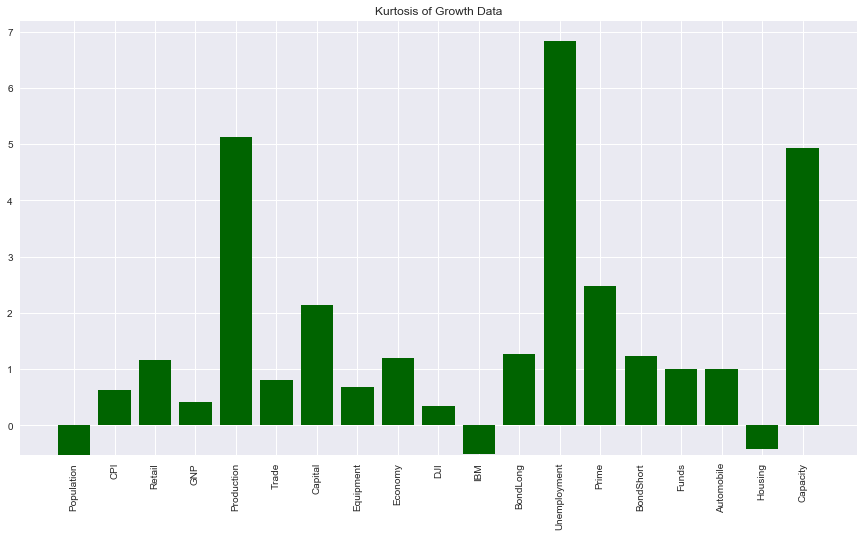

In [25]:
# Plot the bar chart of Kurtosis for new dataframe

plt.figure(figsize=(15,8))
plt.bar(tick_x, df_diff_desc.loc['Kurtosis',:], align='center', color='darkgreen')
plt.xticks(tick_x, names, rotation='vertical')
plt.title('Kurtosis of Growth Data')

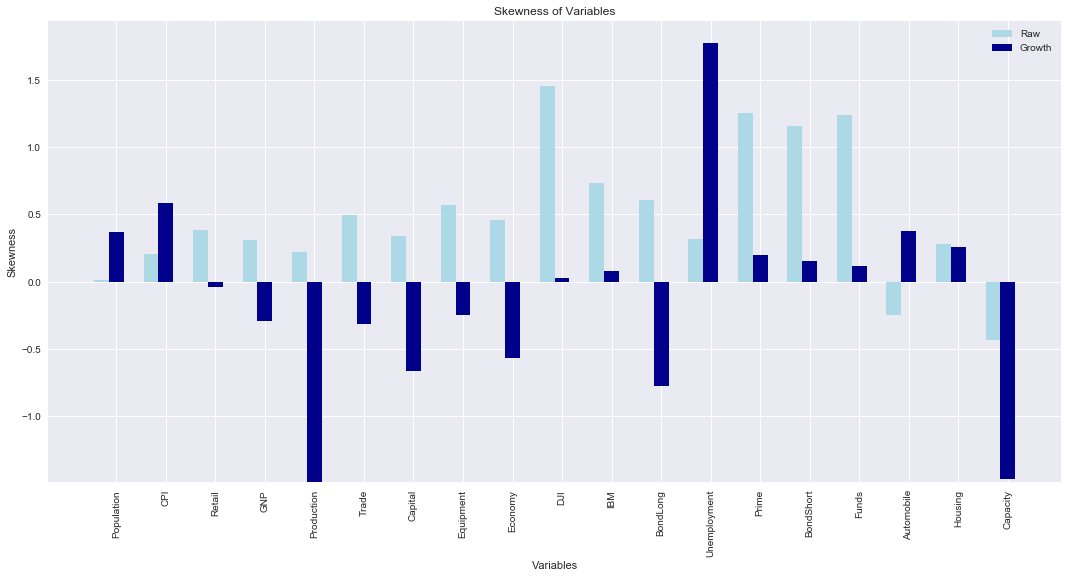

In [30]:
# Plot the bar chart of Skewness

plt.figure(figsize=(15,8))
bar_width = 0.3

plt.bar(tick_x, df_desc.loc['Skewness',:], width=bar_width, color='lightblue', label="Raw")
plt.bar(tick_x+bar_width, df_diff_desc.loc['Skewness',:], width=bar_width, color='darkblue', label="Growth")

plt.xlabel("Variables")
plt.ylabel("Skewness")
plt.xticks(tick_x+bar_width, names, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.title('Skewness of Variables')

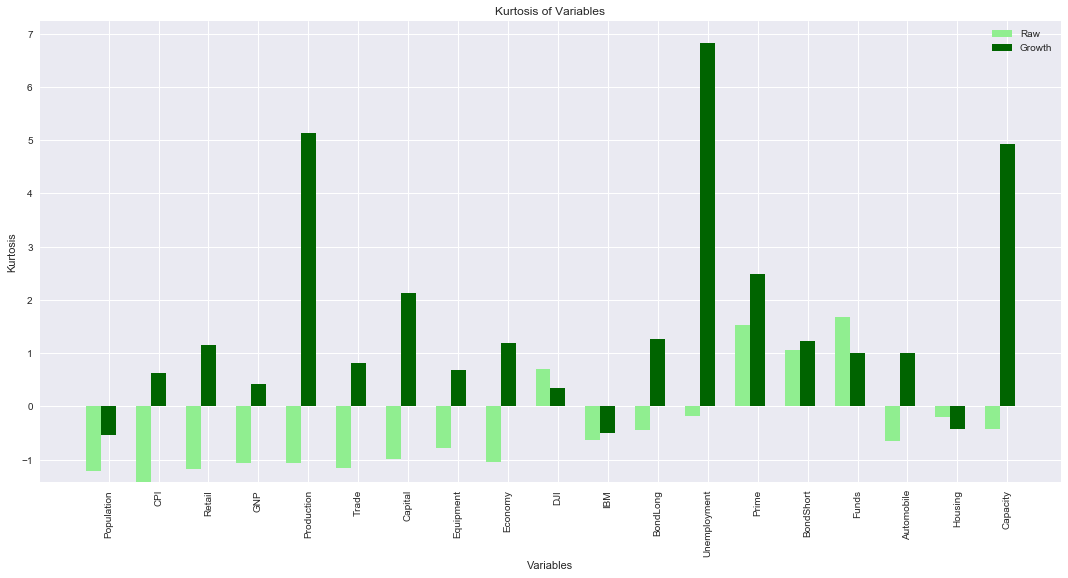

In [31]:
# Plot the bar chart of Kurtosis

plt.figure(figsize=(15,8))
bar_width = 0.3

plt.bar(tick_x, df_desc.loc['Kurtosis',:], width=bar_width, color='lightgreen', label="Raw")
plt.bar(tick_x+bar_width, df_diff_desc.loc['Kurtosis',:], width=bar_width, color='darkgreen', label="Growth")

plt.xlabel("Variables")
plt.ylabel("Kurtosis")
plt.xticks(tick_x+bar_width, names, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.title('Kurtosis of Variables')

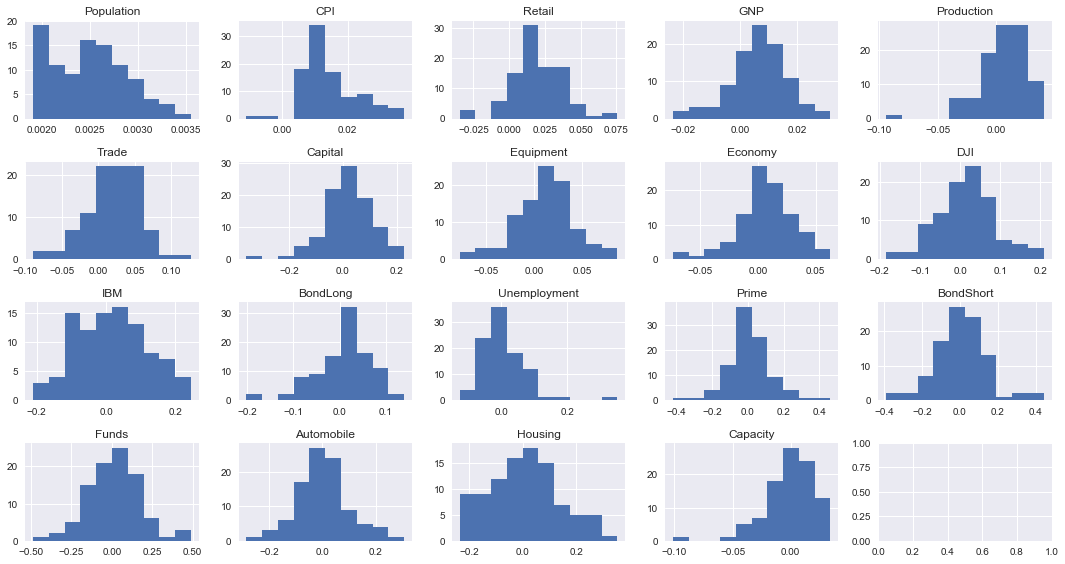

In [40]:
# histogram of transformed variables

fig, axs = plt.subplots(4, 5, figsize=(15,8))

for idx, ax in enumerate(axs.ravel()):
    if idx==19:
        pass
    else:
        ax.hist(df_diff[names[idx]].dropna(axis=0))
        ax.set_title(names[idx])
    
plt.tight_layout()

In [41]:
df_full_dropyear = df_full.drop(['Year'], axis=1)
df_full_dropyear.head()

,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity
0,197.892,0.329,24.165,2241.8000,57.6,67.8,8.088,138.3,73.3,830.56,37.9262,4.40,3.9,5.96,4.72,4.94,8.469,1.067,88.7
1,198.363,0.331,24.221,2255.2000,57.2,71.2,8.342,139.8,72.9,868.66,44.9585,4.51,3.8,5.50,3.84,4.05,8.916,1.091,86.8
2,198.911,0.334,24.662,2287.7000,56.5,71.3,8.822,138.0,75.4,888.51,50.1298,4.86,3.8,5.50,4.20,3.79,8.760,1.364,84.8
3,199.498,0.337,24.976,2300.6001,58.0,72.2,9.201,142.5,76.9,907.54,57.8531,5.18,4.0,5.50,4.55,3.88,7.866,1.491,85.8
4,199.920,0.341,25.818,2327.3000,59.4,77.3,5.909,146.6,78.0,884.77,61.1022,5.18,3.7,6.00,4.99,4.60,9.482,1.380,86.8


In [43]:
# Normalize the raw dataset

df_nmlz = (df_full_dropyear - df_full_dropyear.mean()) / (df_full_dropyear.max() - df_full_dropyear.min())
df_nmlz.head()

,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity
0,-0.491376,-0.422333,-0.415777,-0.461963,-0.442089,-0.404327,-0.300657,-0.387047,-0.446261,-0.176183,-0.364632,-0.391730,-0.342128,-0.232582,-0.217529,-0.208869,-0.243221,-0.302828,0.405014
1,-0.482698,-0.420380,-0.415340,-0.455014,-0.449510,-0.396314,-0.292703,-0.381389,-0.451726,-0.159586,-0.309020,-0.380425,-0.356414,-0.262432,-0.293131,-0.265994,-0.154916,-0.288292,0.287730
2,-0.472600,-0.417451,-0.411895,-0.438158,-0.462497,-0.396079,-0.277671,-0.388179,-0.417573,-0.150939,-0.268124,-0.344453,-0.356414,-0.262432,-0.262203,-0.282682,-0.185734,-0.122937,0.164273
3,-0.461785,-0.414521,-0.409442,-0.431468,-0.434667,-0.393957,-0.265802,-0.371204,-0.397081,-0.142649,-0.207046,-0.311565,-0.327843,-0.262432,-0.232134,-0.276905,-0.362344,-0.046014,0.226002
4,-0.454009,-0.410615,-0.402866,-0.417621,-0.408693,-0.381938,-0.368896,-0.355738,-0.382054,-0.152568,-0.181352,-0.311565,-0.370700,-0.229986,-0.194333,-0.230692,-0.043102,-0.113246,0.287730


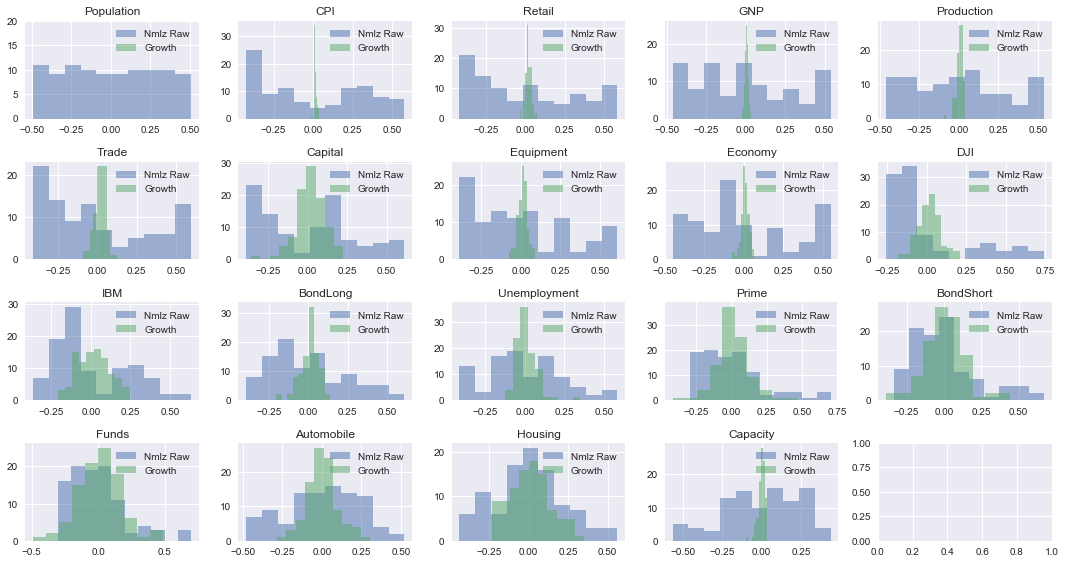

In [44]:
# histogram of transformed variables

fig_duo, axs_duo = plt.subplots(4, 5, figsize=(15,8))

for idx_duo, ax_duo in enumerate(axs_duo.ravel()):
    if idx_duo==19:
        pass
    else:
        ax_duo.hist(df_nmlz[names[idx_duo]].dropna(axis=0), alpha=0.5, label='Nmlz Raw')
        ax_duo.hist(df_diff[names[idx_duo]].dropna(axis=0), alpha=0.5, label='Growth')
        ax_duo.legend(loc='upper right')
        ax_duo.set_title(names[idx_duo])
    
plt.tight_layout()
plt.show()

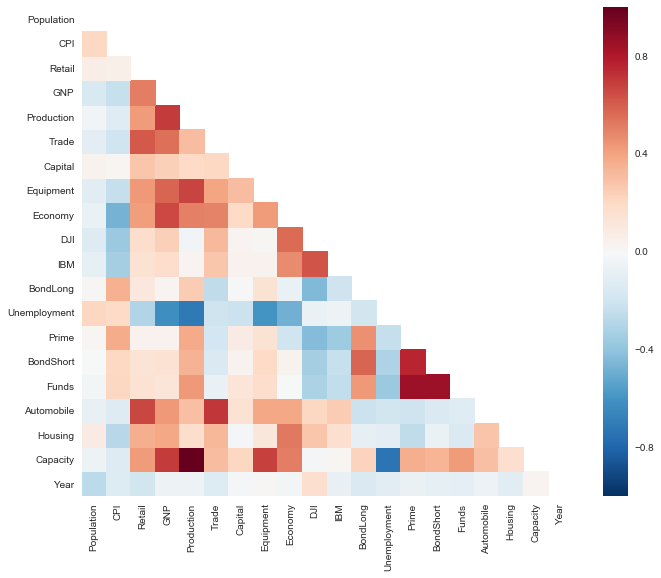

In [50]:
# Compute the correlation matrix

corr = df_diff.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask_ur = np.zeros_like(corr, dtype=np.bool)
mask_ur[np.triu_indices_from(mask_ur)] = True

# Set up the figure
fig_corr, axs_corr = plt.subplots(figsize=(11,9))

# Draw the heatmap with mask
sns.heatmap(corr, mask=mask_ur)


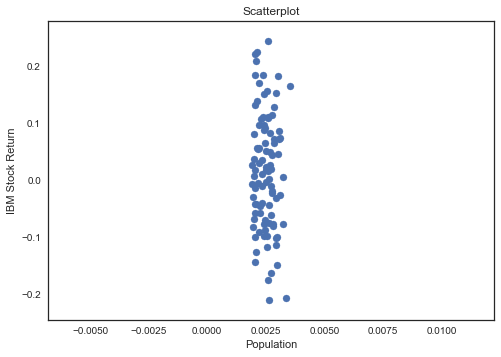

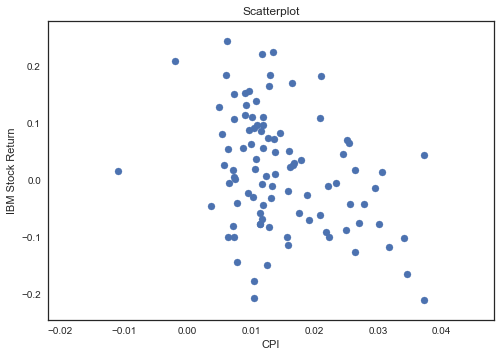

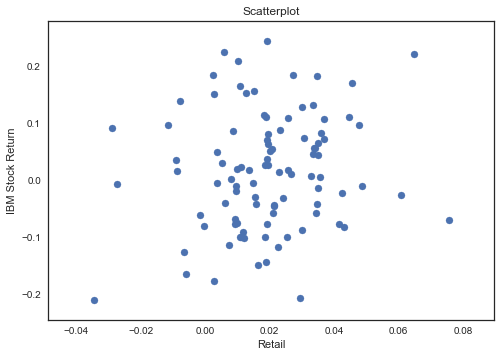

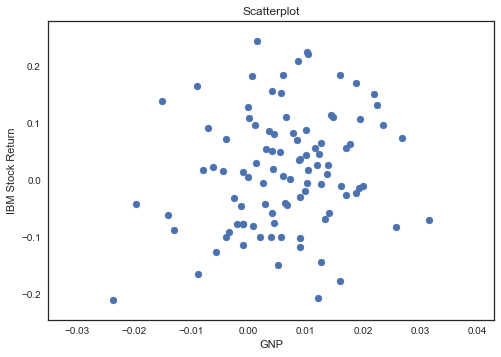

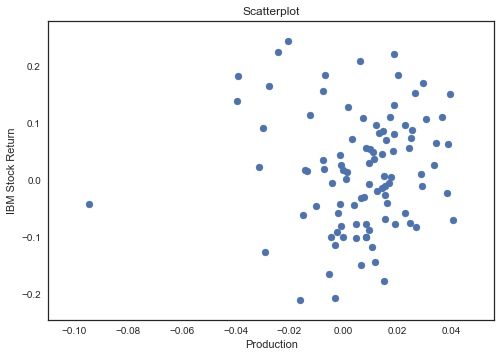

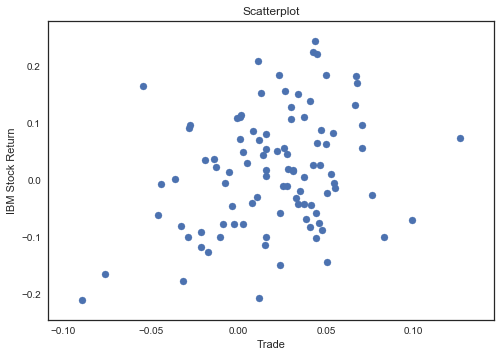

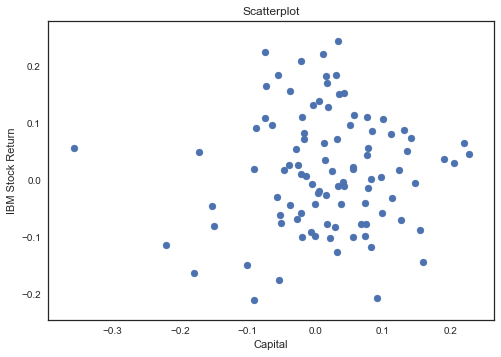

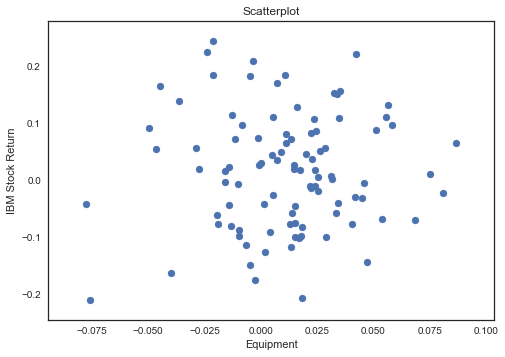

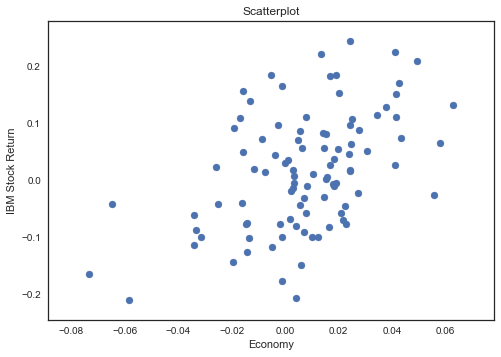

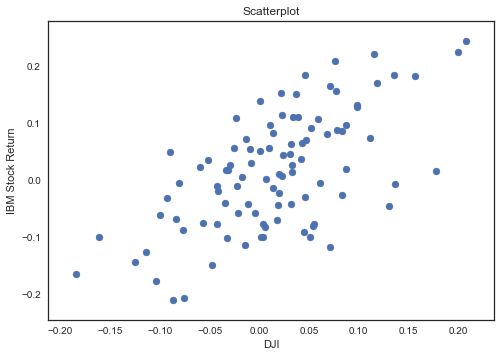

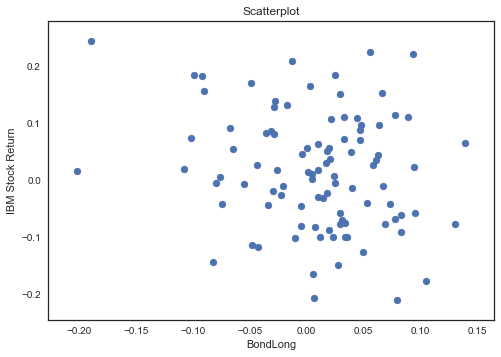

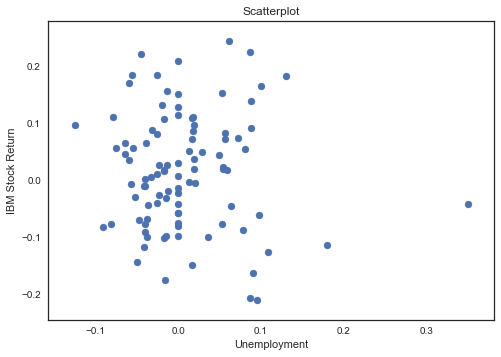

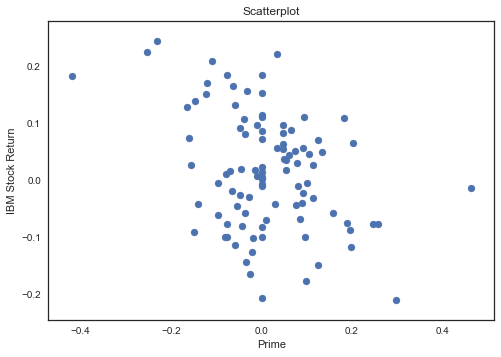

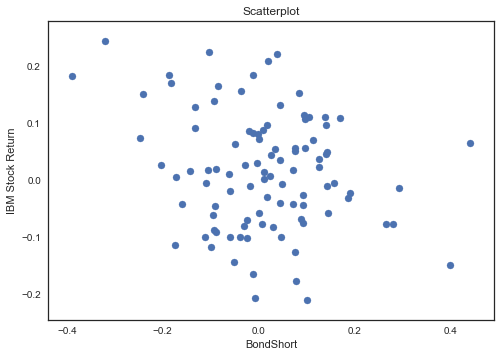

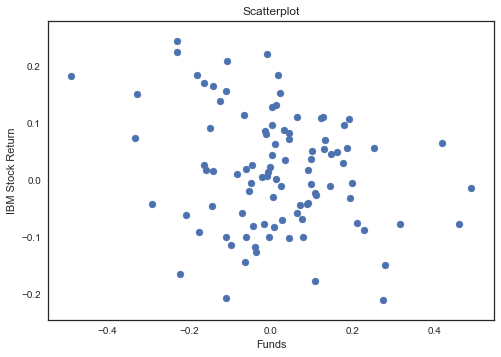

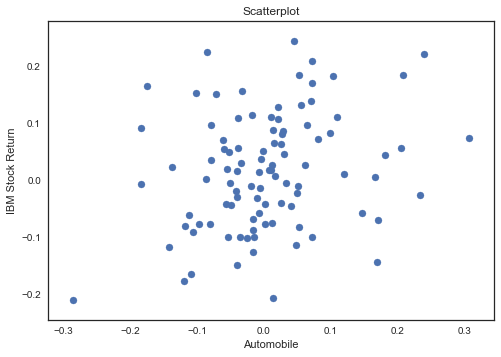

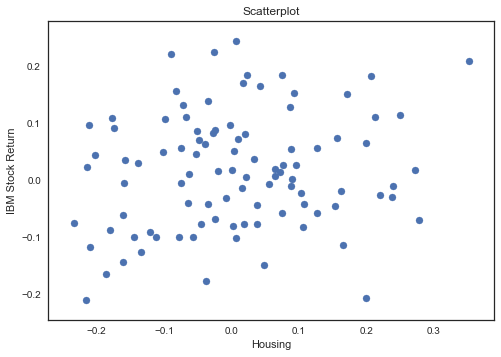

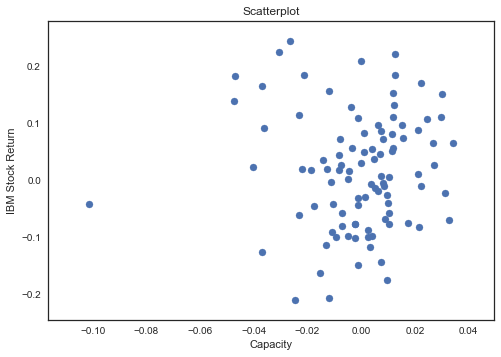

In [57]:
# Scatterplot of IBM vs others

for var in names:
    if var=='IBM':
        pass
    else:
        plt.scatter(df_diff[var].dropna(axis=0),df_diff['IBM'].dropna(axis=0))
        plt.title("Scatterplot")
        plt.xlabel(var)
        plt.ylabel("IBM Stock Return")
        plt.show()

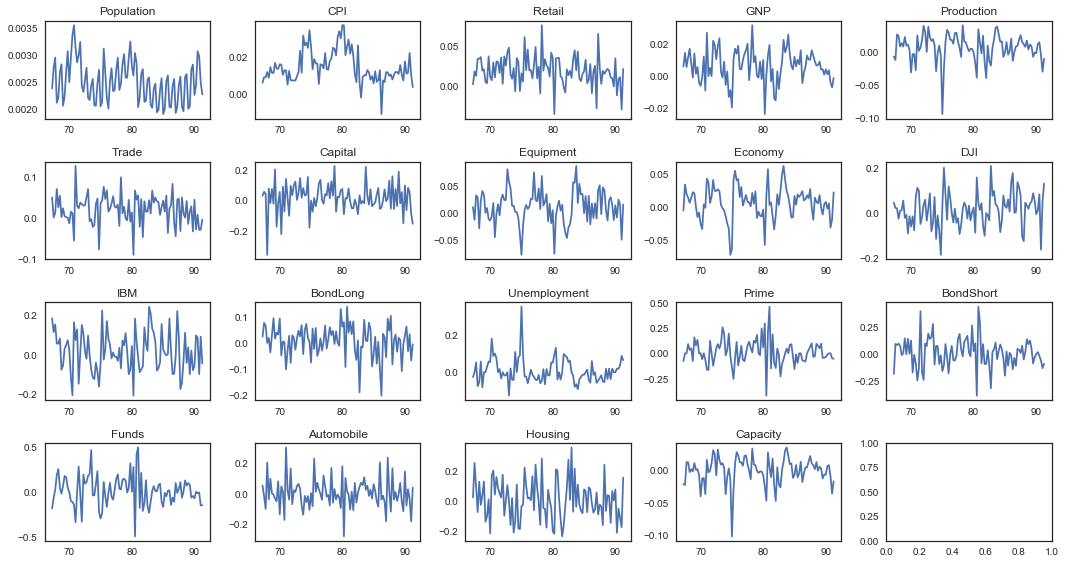

In [59]:
# Time Dependence of variables

fig_time, axs_time = plt.subplots(4, 5, figsize=(15,8))

for idx_time, ax_time in enumerate(axs_time.ravel()):
    if idx_time==19:
        pass
    else:
        ax_time.plot(df_diff['Year'],df_diff[names[idx_time]])
        ax_time.set_title(names[idx_time])
        
plt.tight_layout()